# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [4]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    # ... ENTER YOUR CODE HERE ...
    return (f(x+h)-f(x))/h

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [5]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 --  0.0001
0.001000 --   1e-06
0.000100 --   1e-08
0.000010 --   1e-10


 ... ENTER YOUR COMMENTS HERE ...

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [6]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

one side
0.010000 -- 0.01503
0.001000 --  0.0015
0.000100 -- 0.00015
0.000010 -- 1.5e-05


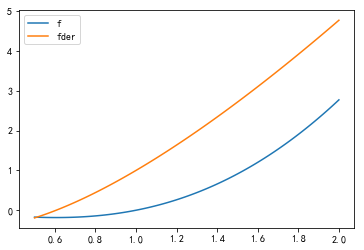

In [7]:
# ... ENTER YOUR CODE HERE ...
import numpy as np
import matplotlib.pyplot as plt
print("one side")
x = 1
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h)-fder(x)
    print("%5f -- %7.4g" % (h, err))

xv=np.linspace(0.5,2,100)
yv=[f(_) for _ in xv]
yderv=[fder(_) for _ in xv]
plt.plot(xv,yv,label='f')
plt.plot(xv,yderv,label='fder')
plt.legend()



### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [8]:
def deriv2points(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

print("two points")
x = 1
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv2points(f, x, h)-fder(x)
    print("%5f -- %7.4g" % (h, err))

def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

def deriv3point(f,x,h):
    return (-3/2*f(x)+2*f(x+h)-1/2*f(x+2*h))/h
print("three point")
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv3point(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

two points
0.010000 -- 3.333e-05
0.001000 -- 3.333e-07
0.000100 -- 3.333e-09
0.000010 -- 3.433e-11
0.010000 -- -0.04605
0.001000 -- -0.006908
0.000100 -- -0.000921
0.000010 -- -0.0001151
three point
0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


... ENTER YOUR EXPLANATION HERE ...

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [9]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    # ... ENTER YOUR CODE HERE ...
    N=2
    lastv=np.finfo(float).max
    
    while True:
        print(N)
        xv=np.linspace(a,b,N+1)
        h=(b-a)/N
        s=0
        for i in range(N):
            x=xv[i]
            midp=x+h/2
            #print(midp)
            Qk=h*func(midp)
            s+=Qk
        if abs(lastv-s)<eps:
            break
        print(abs(lastv-s))
        # prepare the next loop
        lastv=s
        N=2*N
    return lastv,N

lastv,N=midpoint_rule(lambda x: x**3 , 0, 1, 1e-5)
print(lastv)
print(N)

2
1.7976931348623157e+308
4
0.0234375
8
0.005859375
16
0.00146484375
32
0.0003662109375
64
9.1552734375e-05
128
2.288818359375e-05
256
0.24999237060546875
256


### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


... ENTER YOUR CODE AND COMMENTS HERE ...

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [10]:
# ... ENTER YOUR CODE HERE ...
def f(x):
    return np.sin(np.sqrt(x))/x
lastv,N=midpoint_rule(f, 0, 1, 1e-4)
print(lastv)



def f_sub_sing(x):
    # sub the singular  1/np.sqrt(x)
    return np.sin(np.sqrt(x))/x - 1/np.sqrt(x)
lastv,N=midpoint_rule(f_sub_sing, 0, 1, 1e-4)
# 2 is the result of singular integral of 1/np.sqrt(x)
print(lastv+2)

2
1.7976931348623157e+308
4
0.12324036676734296
8
0.08829439704432818
16
0.06265017401147421
32
0.04432536270351983
64
0.031338440312389304
128
0.022154789570421052
256
0.015663266099519513
512
0.011074498495650786
1024
0.007830411315079555
2048
0.005536767881334281
4096
0.003915023117753824
8192
0.002768316315973518
16384
0.0019574868782834542
32768
0.0013841492392243637
65536
0.0009787402376089105
131072
0.0006920734756408198
262144
0.0004893697113108608
524288
0.00034603659304921486
1048576
0.00024468480437733753
2097152
